In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../../Data/loan.csv', low_memory = False)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['target']=np.where(df['loan_status'].isin(['Default','Charged Off','Does not meet the credit policy. Status:Charged Off']),1,0)
df.drop('loan_status', axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000,887379.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307,0.053222
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067,0.224476
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000,1.000000


In [7]:
df.drop(['id','member_id','url','zip_code','emp_title','issue_d','addr_state','title'], axis = 1, inplace = True)

In [8]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'desc', 'purpose',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'ope

In [9]:
num = df.select_dtypes(include = 'number')
char = df.select_dtypes(include = 'object')

In [10]:
num.isnull().mean()

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
int_rate                       0.000000
installment                    0.000000
annual_inc                     0.000005
dti                            0.000000
delinq_2yrs                    0.000033
inq_last_6mths                 0.000033
mths_since_last_delinq         0.511971
mths_since_last_record         0.845553
open_acc                       0.000033
pub_rec                        0.000033
revol_bal                      0.000000
revol_util                     0.000566
total_acc                      0.000033
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000


In [11]:
def drop_features(df):
    for col in df.columns:
        if df[col].isnull().mean() > 0.3:
            print(col)
            df.drop([col], axis = 1, inplace = True)

In [12]:
drop_features(num)

mths_since_last_delinq
mths_since_last_record
mths_since_last_major_derog
annual_inc_joint
dti_joint
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
inq_fi
total_cu_tl
inq_last_12m


In [13]:
num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'target'],
      dtype='object')

In [14]:
char.isnull().mean()

term                         0.000000
grade                        0.000000
sub_grade                    0.000000
emp_length                   0.050514
home_ownership               0.000000
verification_status          0.000000
pymnt_plan                   0.000000
desc                         0.857980
purpose                      0.000000
earliest_cr_line             0.000033
initial_list_status          0.000000
last_pymnt_d                 0.019900
next_pymnt_d                 0.285077
last_credit_pull_d           0.000060
application_type             0.000000
verification_status_joint    0.999424
dtype: float64

In [15]:
char.drop(['desc','verification_status_joint'], axis = 1, inplace = True)

In [16]:
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy = 'median')
char_imp = SimpleImputer(strategy = 'most_frequent')
num = pd.DataFrame(num_imp.fit_transform(num), columns = num.columns)
char = pd.DataFrame(char_imp.fit_transform(char), columns = char.columns)

In [17]:
df = pd.concat([num,char], axis = 1)

In [18]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,home_ownership,verification_status,pymnt_plan,purpose,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,...,RENT,Verified,n,credit_card,Jan-1985,f,Jan-2015,Feb-2016,Jan-2016,INDIVIDUAL
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,...,RENT,Source Verified,n,car,Apr-1999,f,Apr-2013,Feb-2016,Sep-2013,INDIVIDUAL
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,...,RENT,Not Verified,n,small_business,Nov-2001,f,Jun-2014,Feb-2016,Jan-2016,INDIVIDUAL
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,...,RENT,Source Verified,n,other,Feb-1996,f,Jan-2015,Feb-2016,Jan-2015,INDIVIDUAL
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,...,RENT,Source Verified,n,other,Jan-1996,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL


In [19]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'target', 'term',
       'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='grade', ylabel='target'>

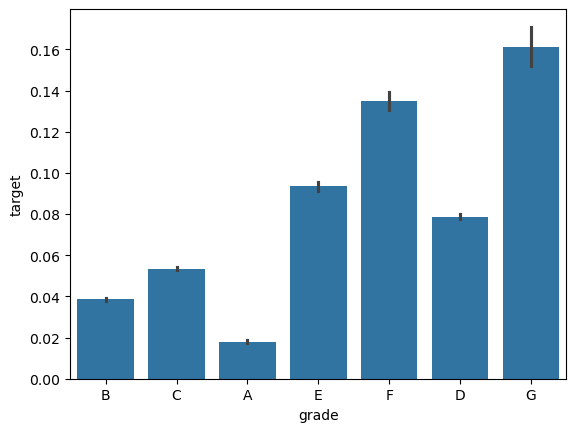

In [21]:
sns.barplot(df, x = 'grade', y = 'target')

<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

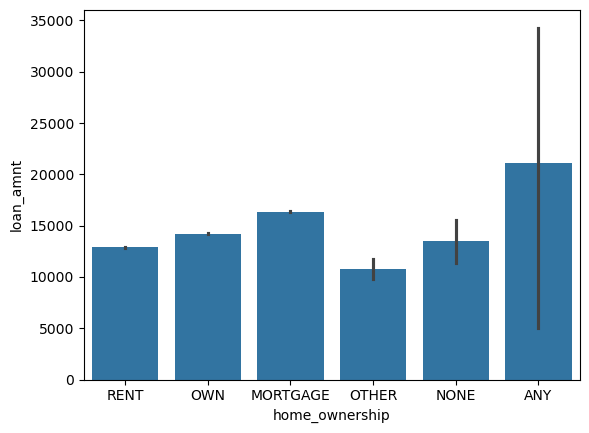

In [22]:
sns.barplot(df, x = 'home_ownership', y = 'loan_amnt')

In [23]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'target', 'term',
       'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [33]:
num = df.select_dtypes(include = 'number')
char = df.select_dtypes(include = 'object')

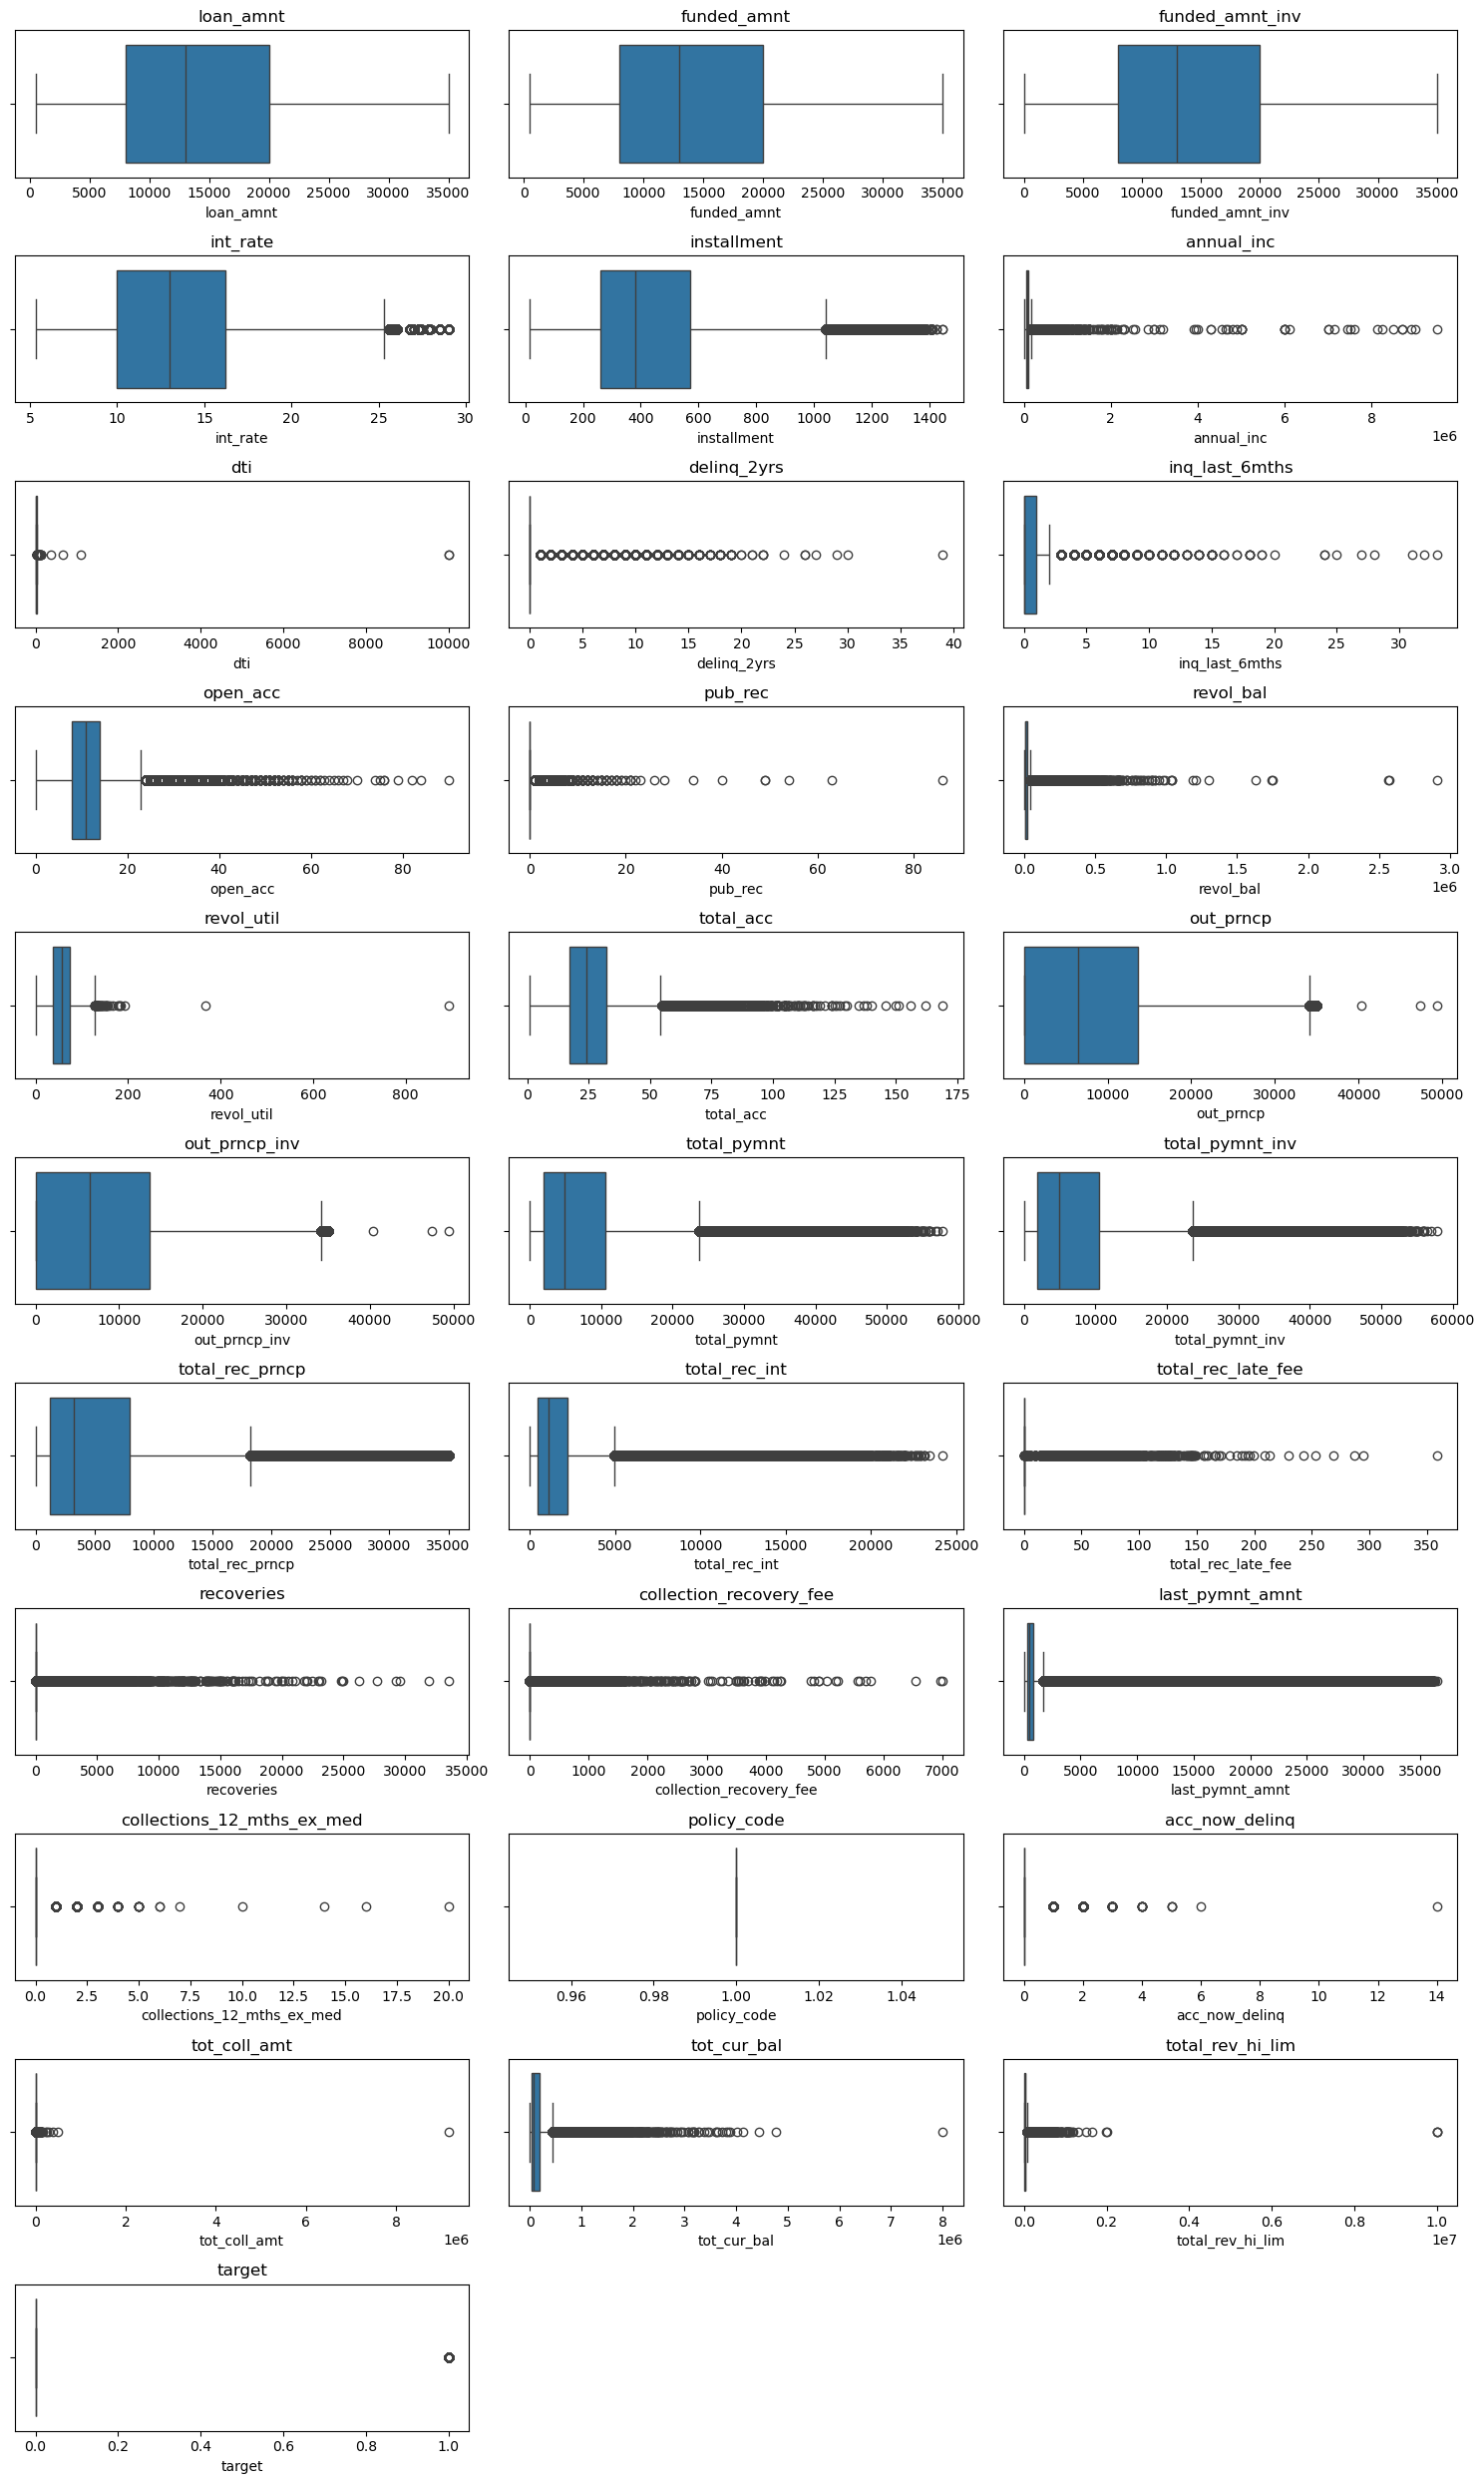

In [40]:
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(15, 25))
axes = axes.flatten()

for i, column in enumerate(num.columns):
    sns.boxplot(x=num[column], ax=axes[i])
    axes[i].set_title(column)

for j in range(len(num.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<Axes: xlabel='inq_last_6mths', ylabel='annual_inc'>

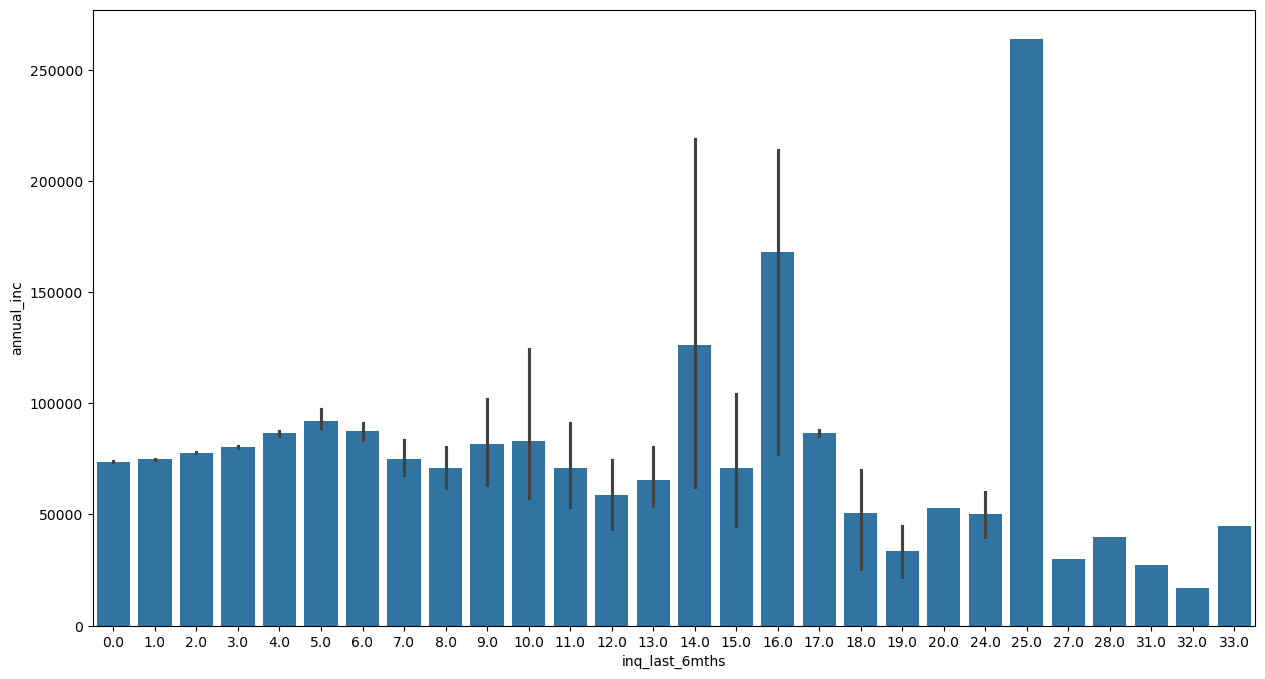

In [51]:
plt.figure(figsize = (15,8))
sns.barplot(df, x = 'inq_last_6mths', y = 'annual_inc')

In [49]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'target', 'term',
       'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [54]:
df.drop(['policy_code'], axis = 1, inplace = True)

C:\Users\pranj\AppData\Local\Temp\ipykernel_22244\4121238633.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num[column], ax=axes[i])
C:\Users\pranj\AppData\Local\Temp\ipykernel_22244\4121238633.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num[column], ax=axes[i])
C:\Users\pranj\A

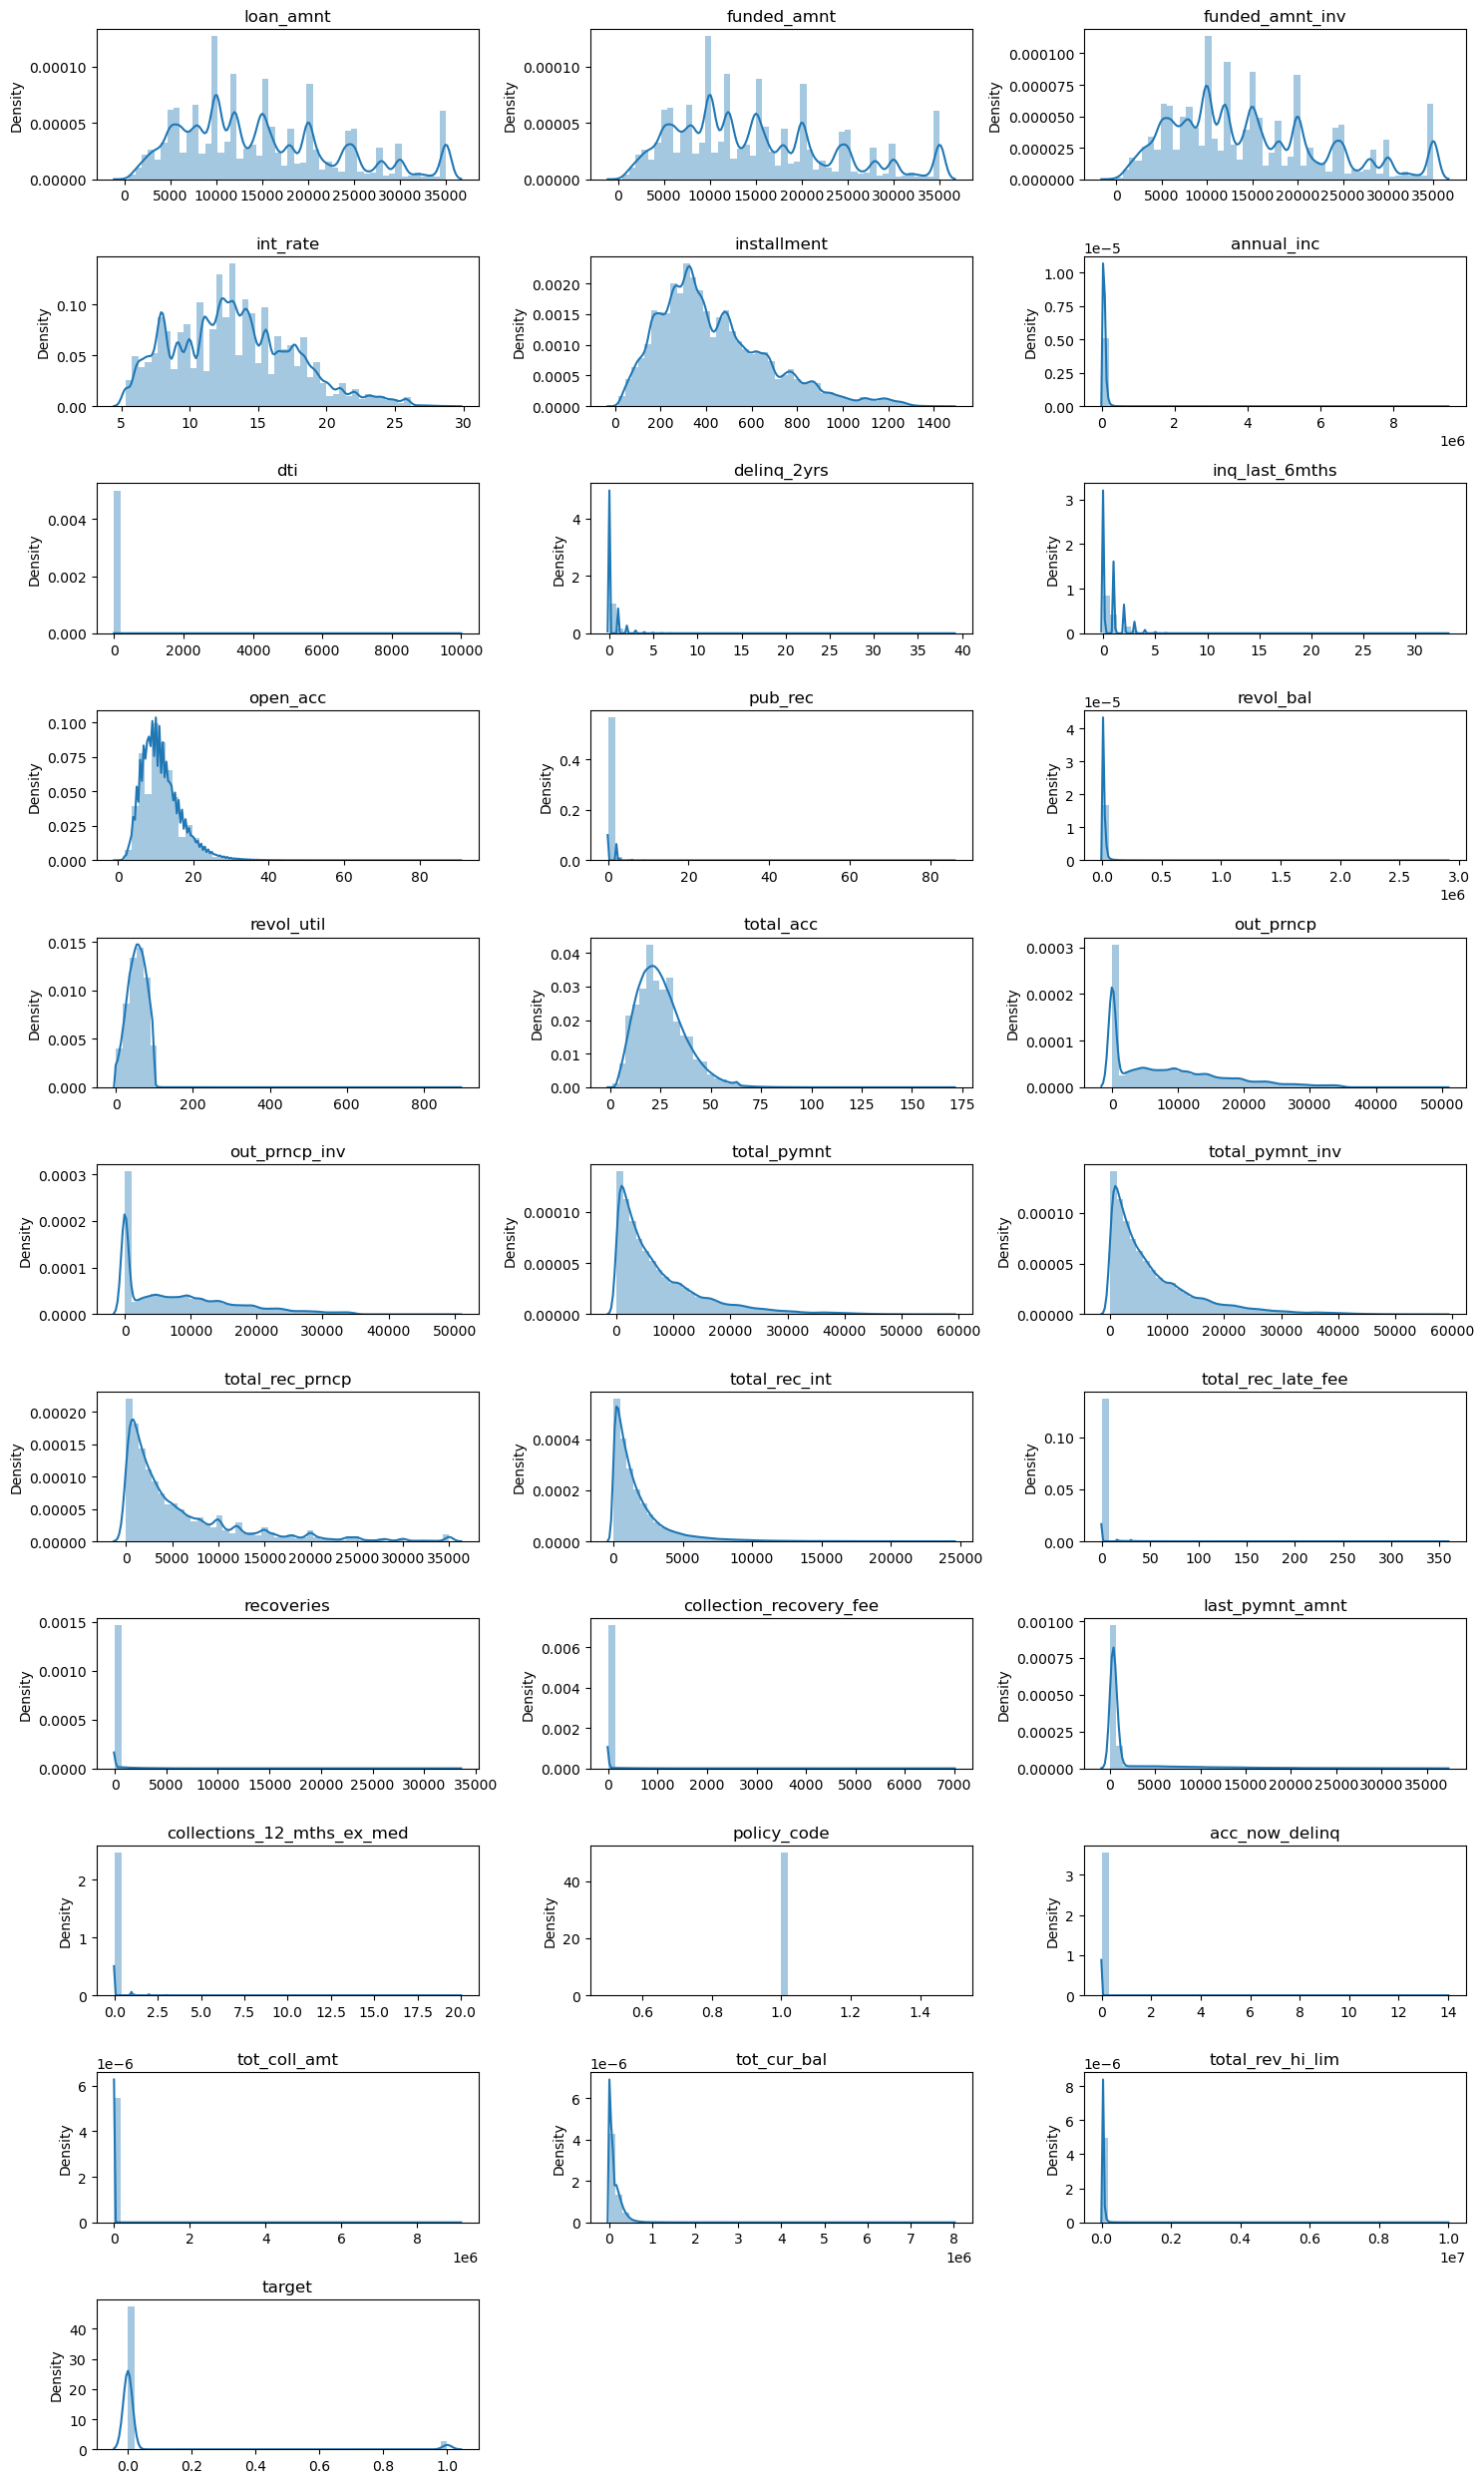

In [56]:
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(15, 25))
axes = axes.flatten()

for i, column in enumerate(num.columns):
    sns.distplot(x=num[column], ax=axes[i])
    axes[i].set_title(column)

for j in range(len(num.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [61]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    886868
JOINT            511
Name: count, dtype: int64

In [62]:
df['last_pymnt_d']

0         Jan-2015
1         Apr-2013
2         Jun-2014
3         Jan-2015
4         Jan-2016
            ...   
887374    Jan-2016
887375    Jan-2016
887376    Jan-2016
887377    Jan-2016
887378    Jan-2016
Name: last_pymnt_d, Length: 887379, dtype: object

In [63]:
num.drop(['policy_code'], axis =1, inplace = True)

In [64]:
num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'target'],
      dtype='object')

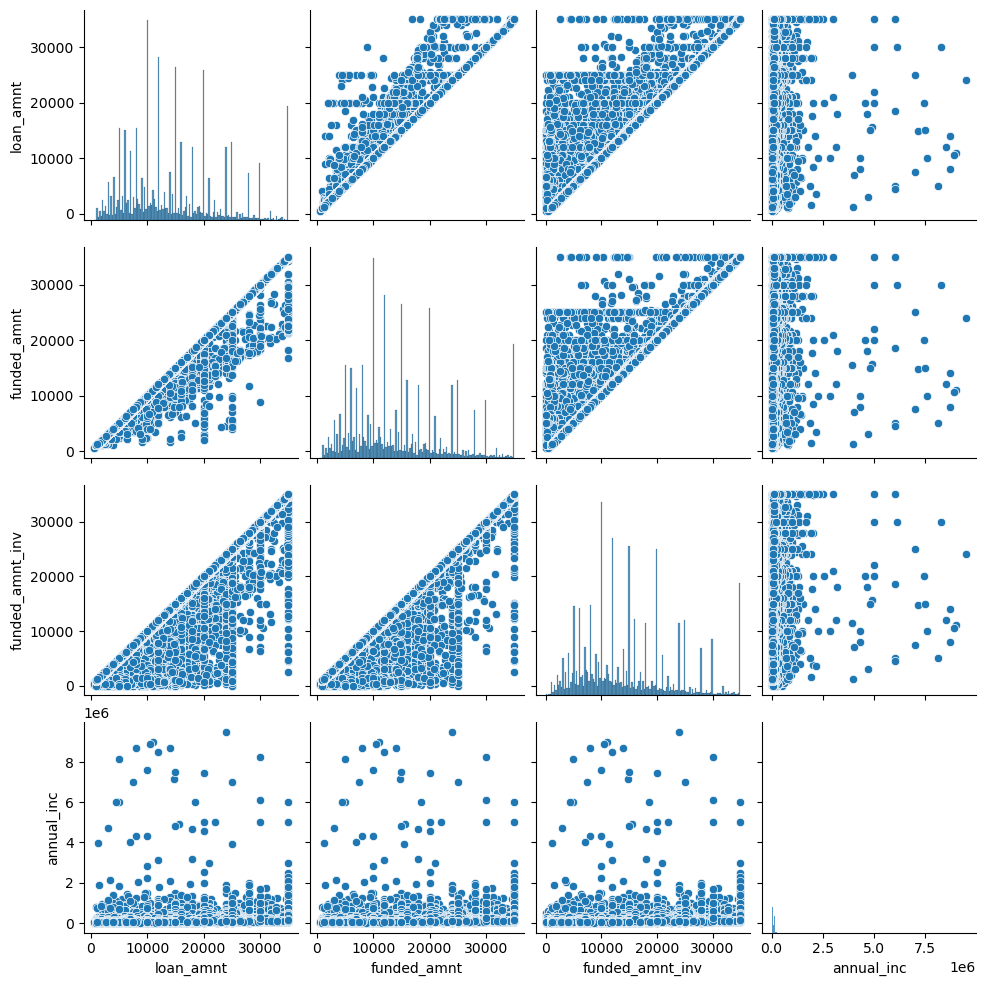

In [65]:
data = num[['loan_amnt', 'funded_amnt', 'funded_amnt_inv','annual_inc']]
sns.pairplot(data)

In [66]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, strategy='quantile',encode='ordinal')
num_binned = pd.DataFrame(kbins.fit_transform(num), columns = num.columns)

C:\Users\pranj\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:216: FutureWarning: In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\pranj\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\pranj\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\pranj\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consider decreasing the number of bins.
  warnings.warn

In [67]:
Y = df['target']
X = df.drop(['target'], axis = 1)

In [92]:
num_binned.drop(['target'], axis = 1, inplace = True)

In [93]:
num_Y = pd.concat([num_binned,Y], axis = 1)

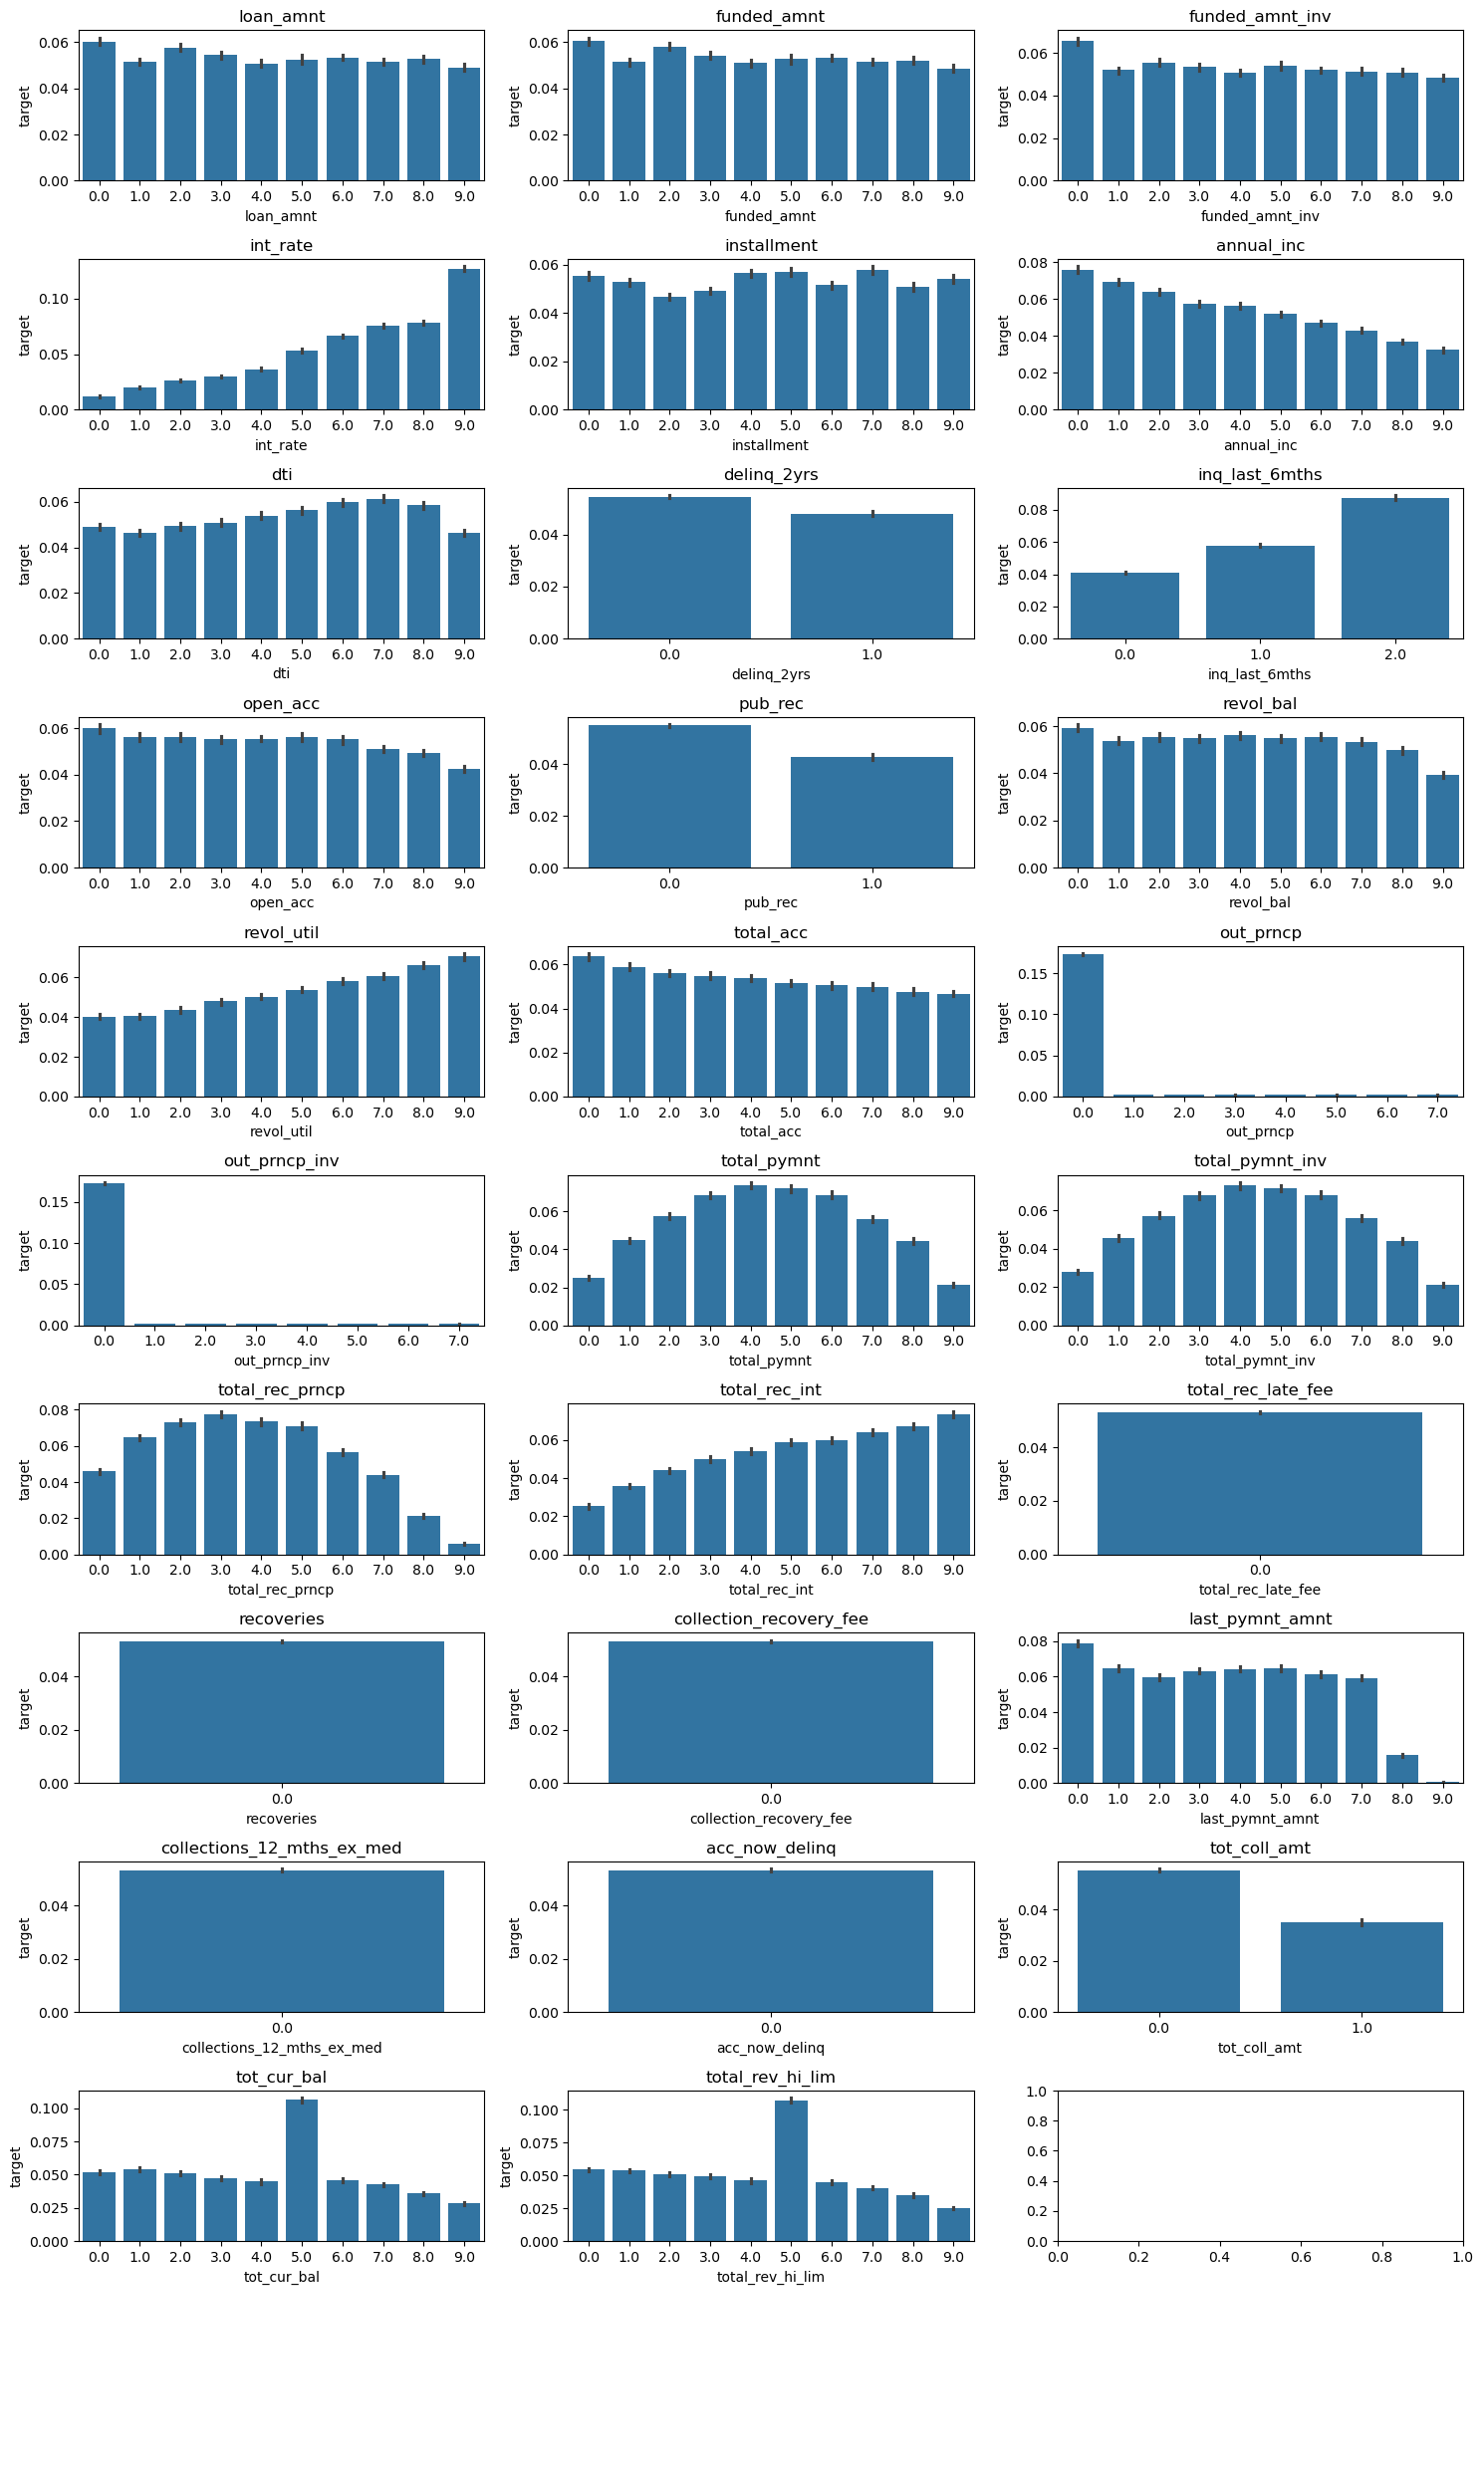

In [94]:
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(15, 25))
axes = axes.flatten()
for i, column in enumerate(num_binned.columns):
    sns.barplot(x=column, y = 'target', data = num_Y, ax=axes[i])
    axes[i].set_title(column)

for j in range(len(num.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [95]:
char_Y = pd.concat([char,Y], axis = 1)

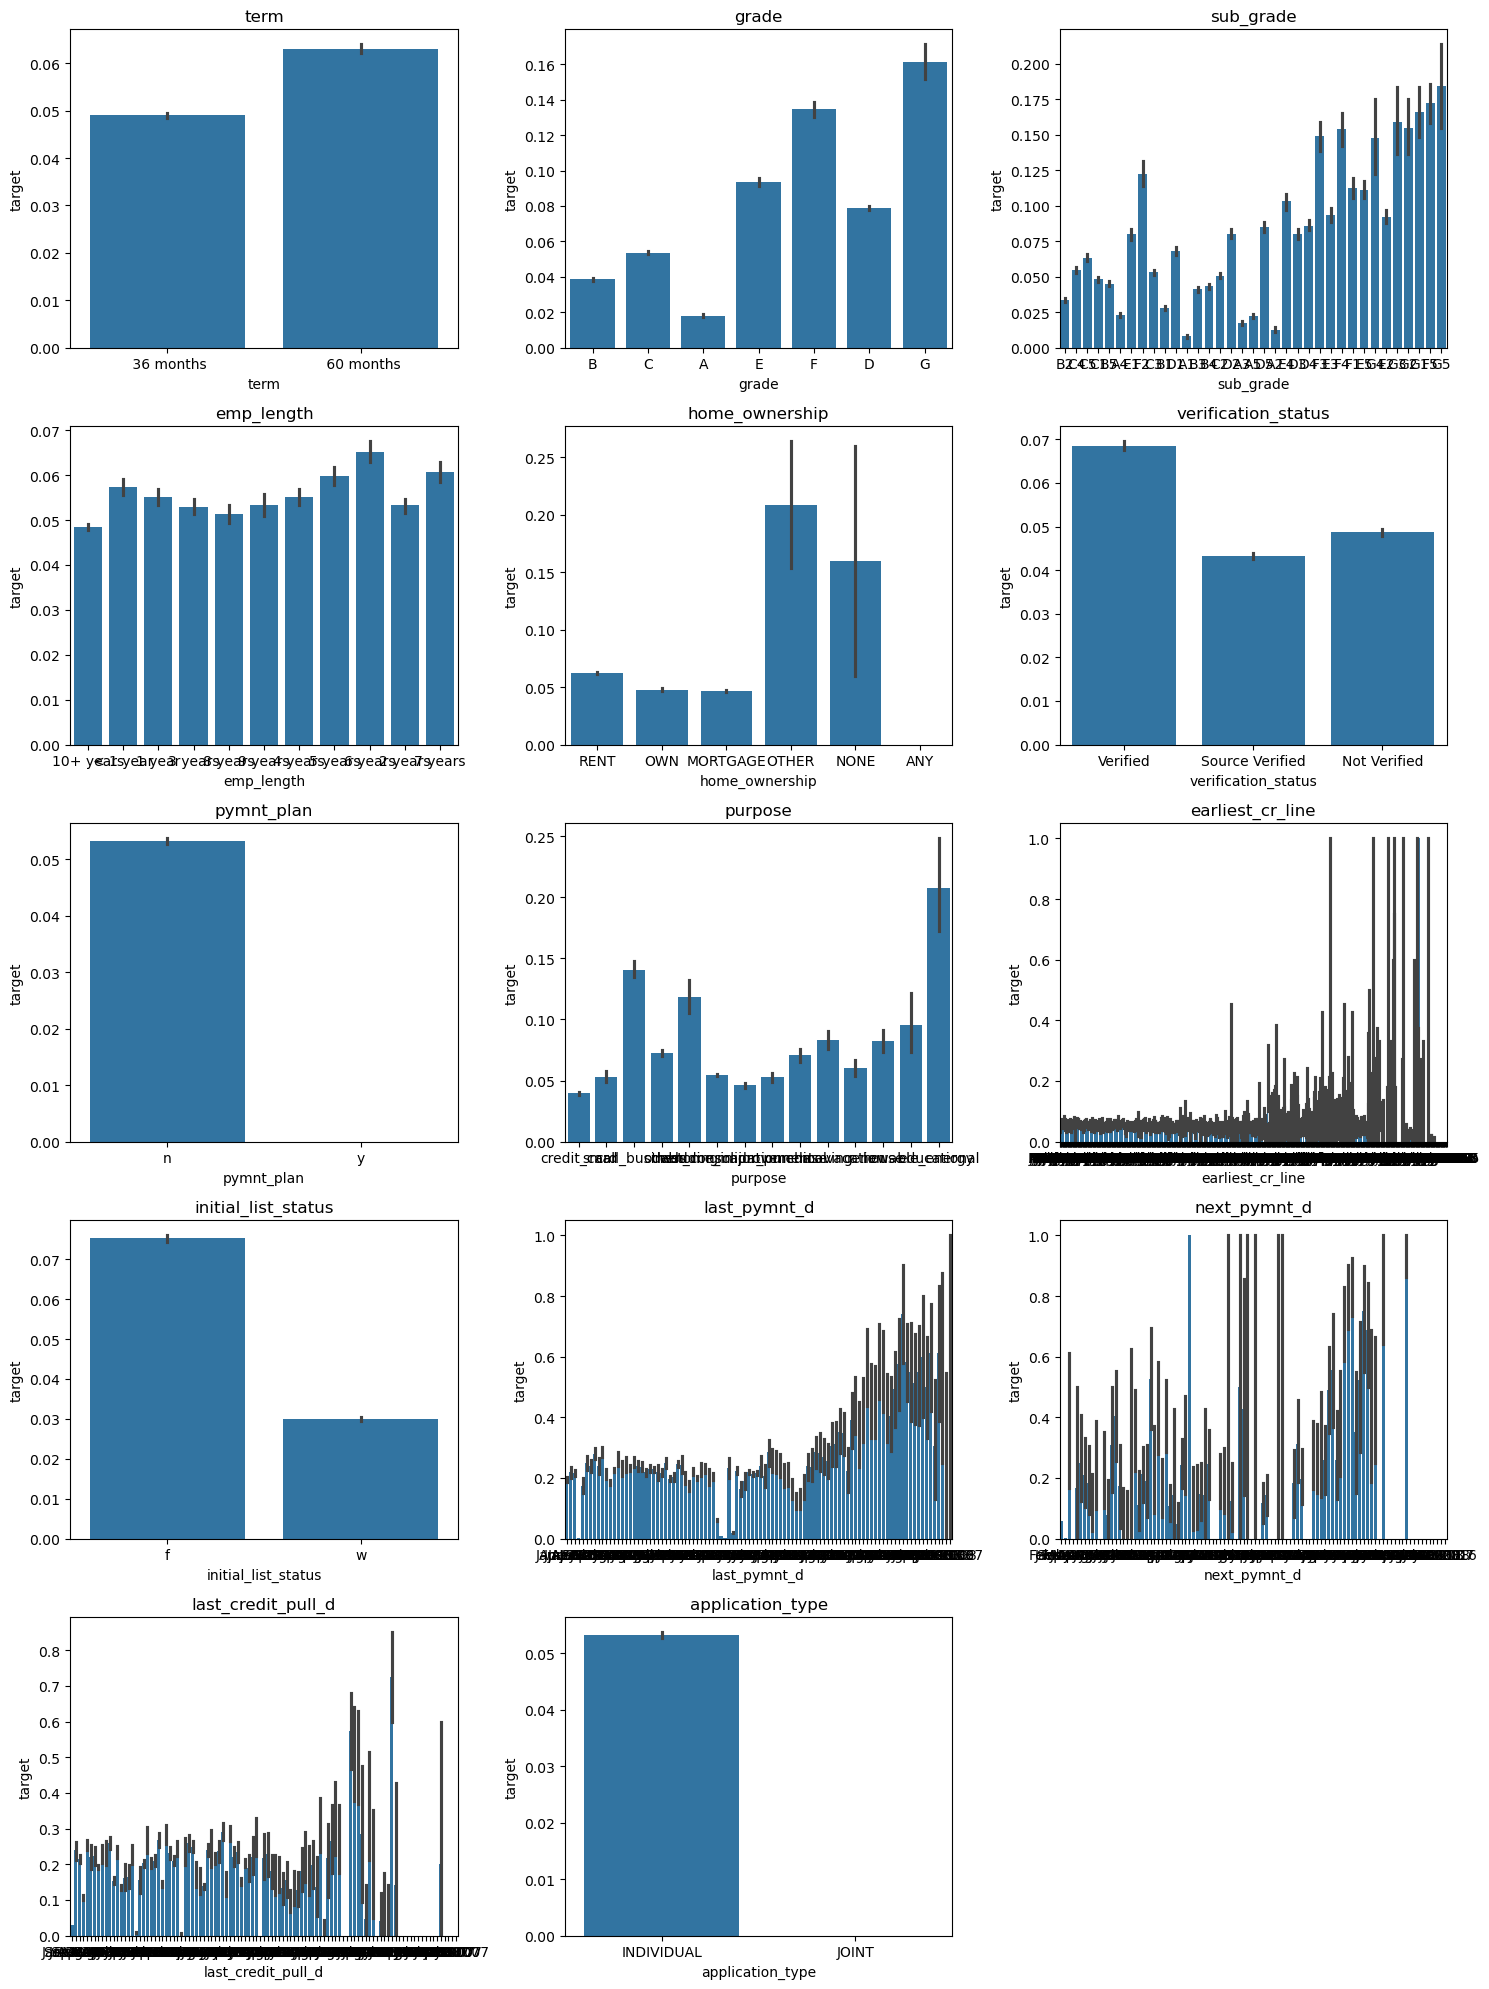

In [97]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()
for i, column in enumerate(char.columns):
    sns.barplot(x=column, y = 'target', data = char_Y, ax=axes[i])
    axes[i].set_title(column)

for j in range(len(char.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(['target'], axis = 1)
y = df['target']
num = X.select_dtypes(include = 'number')
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(num, y)
feat_importances = pd.DataFrame(importances, num.columns)
feat_importances.plot(kind = 'barh', color = 'teal')

In [ ]:
char = X_train.select_dtypes(include='object')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

oe = OrdinalEncoder()
char_encoded = pd.DataFrame(oe.fit_transform(char), columns=char.columns)

chi2_features = SelectKBest(chi2, k=5)

X_kbest_ftrs = pd.DataFrame(chi2_features.fit_transform(char_encoded, Y_train))

selected_feature_indices = chi2_features.get_support(indices=True)
selected_feature_names = char_encoded.columns[selected_feature_indices]

print(selected_feature_names)

In [ ]:
from sklearn.feature_selection import f_regression
f_features = SelectKBest(f_regression, k=12)

X_kbest_ftrs = pd.DataFrame(f_features.fit_transform(num, Y_train))

selected_feature_indices = f_features.get_support(indices=True)
selected_feature_names = num.columns[selected_feature_indices]

print(selected_feature_names)